# Yelp API - Lab

The previously deployed lab on working around building a GIS with Yelp API and Folium can be found [here](https://github.com/learn-co-curriculum/dsc-2-15-10-yelp-api-gis-lab/tree/a56358c2d0c2daf569a5f50937c4c27463aadb1a) (not relevant for new students).


## Introduction 

Now that we've seen how the Yelp API works, and some basic Folium visualizations its time to put those skills to work in order to create a working map! Taking things a step further, you'll also independently explore how to perform pagination in order to retrieve a full results set from the Yelp API!

## Objectives

You will be able to: 
* Create HTTP requests to get data from Yelp API
* Parse HTTP responses and perform data analysis on the data returned
* Perform pagination to retrieve troves of data!
* Create a simple geographical system on to view information about selected businesses, at a given location. 

## Problem Introduction

You've now worked with some API calls, but we have yet to see how to retrieve a more complete dataset in a programmatic manner. Returning to the Yelp API, the [documentation](https://www.yelp.com/developers/documentation/v3/business_search) also provides us details regarding the API limits. These often include details about the number of requests a user is allowed to make within a specified time limit and the maximum number of results to be returned. In this case, we are told that any request has a maximum of 50 results per request and defaults to 20. Furthermore, any search will be limited to a total of 1000 results. To retrieve all 1000 of these results, we would have to page through the results piece by piece, retriving 50 at a time. Processes such as these are often refered to as pagination.

In this lab, you will define a search and then paginate over the results to retrieve all of the results. You'll then parse these responses as a DataFrame (for further exploration) and create a map using Folium to visualize the results geographically.

## Part I - Make the Initial Request

Start by making an initial request to the Yelp API. Your search must include at least 2 parameters: **term** and **location**. For example, you might search for pizza restaurants in NYC. The term and location is up to you, but make the request below.

In [4]:
#Your code here
import requests
term = 'Asian'
location = 'Midtown Manhattan NY'
SEARCH_LIMIT = 10

url = 'https://api.yelp.com/v3/businesses/search'

api_key = 

headers = {
        'Authorization': 'Bearer {}'.format(api_key),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
response = requests.get(url, headers=headers, params=url_params)
print(response)
print(type(response.text))
print(response.text[:1000])

<Response [200]>
<class 'str'>
{"businesses": [{"id": "NN3mOWF5e_pnR1ArqM2bHQ", "alias": "obao-new-york-3", "name": "OBAO", "image_url": "https://s3-media4.fl.yelpcdn.com/bphoto/CpVI2XJLrvg09Fm83bfPog/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/obao-new-york-3?adjust_creative=hKqOVNUAFJSvHafqA8ZJjA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=hKqOVNUAFJSvHafqA8ZJjA", "review_count": 2110, "categories": [{"alias": "vietnamese", "title": "Vietnamese"}, {"alias": "thai", "title": "Thai"}, {"alias": "asianfusion", "title": "Asian Fusion"}], "rating": 4.0, "coordinates": {"latitude": 40.7606544, "longitude": -73.991332}, "transactions": ["pickup", "delivery"], "price": "$$", "location": {"address1": "647 9th Ave", "address2": "", "address3": "", "city": "New York", "zip_code": "10036", "country": "US", "state": "NY", "display_address": ["647 9th Ave", "New York, NY 10036"]}, "phone": "+12122458880", "display_phone": "(212) 245-8880", "distance": 130

In [5]:
len(response.json()['businesses'])

10

In [6]:
response.json().keys()

dict_keys(['businesses', 'total', 'region'])

In [7]:
response.json()['total']

7500

## Pagination

Now that you have an initial response, you can examine the contents of the json container. For example, you might start with ```response.json().keys()```. Here, you'll see a key for `'total'`, which tells you the full number of matching results given your query parameters. Write a loop (or ideally a function) which then makes successive API calls using the offset parameter to retrieve all of the results (or 5000 for a particularly large result set) for the original query. As you do this, be mindful of how you store the data. Your final goal will be to reformat the data concerning the businesses themselves into a pandas DataFrame from the json objects.

**Note: be mindful of the API rate limits. You can only make 5000 requests per day, and are also can make requests too fast. Start prototyping small before running a loop that could be faulty. You can also use time.sleep(n) to add delays. For more details see https://www.yelp.com/developers/documentation/v3/rate_limiting.**

In [8]:
# Your code here; use a function or loop to retrieve all the results from your original requests
import requests
import pandas as pd

def yelp_call(url_params, api_key):
    url = 'https://api.yelp.com/v3/businesses/search'
    headers = {'Authorization': 'Bearer {}'.format(api_key)}
    response = requests.get(url, headers=headers, params=url_params)
    df = pd.DataFrame(response.json()['businesses'])
    return df

def total_calls(url_params, api_key):
    no_of_results = response.json()['total']
    c = 0
    dfs = {}
    while c < no_of_results and c < 1000:                  # condition that if met to continue running the function
        url_params['offset'] = c                                    #define the offset parameter for the yelp call to equal cursor, which is currently 0
        dfs.update(yelp_call(url_params, api_key))        # as the yelp call is happening, the data coming in will be put into a list
        c += 50                                                         # each iteration or request yields 50 results - as the function is run, each time add 50 results
        df = pd.concat(dfs, ignore_index=True)
    return dfs

api_key = 
term = 'Asian'
location = 'Midtown Manhattan NY'
url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': 50
            }
df = total_calls(url_params, api_key) 
df

{'alias': 0                             sala-one-nine-new-york
 1                             wisefish-poké-new-york
 2                                  cookshop-new-york
 3                  sachiko-hair-and-make-up-new-york
 4                            koji-izakaya-brooklyn-3
 5                               ramen-lab-new-york-2
 6                                      mana-new-york
 7                     level-two-barber-shop-new-york
 8                          aza-hair-salon-new-york-2
 9                     m-and-j-asian-cuisine-new-york
 10                      may-wah-fast-food-new-york-3
 11              arts-and-crafts-beer-parlor-new-york
 12                     asiam-thai-cuisine-new-york-2
 13                           alcone-company-new-york
 14    new-generation-barber-shop-and-salon-sunnyside
 15                                    shag-manhattan
 16                                   soogil-new-york
 17               look-by-plant-love-house-brooklyn-2
 18                

In [9]:
df.keys()

dict_keys(['alias', 'categories', 'coordinates', 'display_phone', 'distance', 'id', 'image_url', 'is_closed', 'location', 'name', 'phone', 'price', 'rating', 'review_count', 'transactions', 'url'])

In [10]:
data = pd.DataFrame(df)
data.head()

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,sala-one-nine-new-york,"[{'alias': 'tapas', 'title': 'Tapas Bars'}, {'...","{'latitude': 40.7398849, 'longitude': -73.9931...",(212) 229-2300,1395.539587,OUzTKc5YcCPOPG5e8Di67g,https://s3-media1.fl.yelpcdn.com/bphoto/hPYL0w...,False,"{'address1': '35 W 19th St', 'address2': None,...",Sala One Nine,+12122292300,$$,4.0,765,"[delivery, pickup]",https://www.yelp.com/biz/sala-one-nine-new-yor...
1,wisefish-poké-new-york,"[{'alias': 'poke', 'title': 'Poke'}, {'alias':...","{'latitude': 40.74281, 'longitude': -73.99967}",(212) 367-7653,1568.674531,IzY4xwbY7YqPoL_-xCSeRA,https://s3-media2.fl.yelpcdn.com/bphoto/PFdSRn...,False,"{'address1': '263 W 19th St', 'address2': None...",Wisefish Poké,+12123677653,$$,4.0,407,[],https://www.yelp.com/biz/wisefish-pok%C3%A9-ne...
2,cookshop-new-york,"[{'alias': 'newamerican', 'title': 'American (...","{'latitude': 40.7454251, 'longitude': -74.0056...",(212) 924-4440,1888.843014,ssGhu4n3emZ9kEPVf371IQ,https://s3-media3.fl.yelpcdn.com/bphoto/PgQtbd...,False,"{'address1': '156 10th Ave', 'address2': '', '...",Cookshop,+12129244440,$$,4.0,1963,"[delivery, pickup]",https://www.yelp.com/biz/cookshop-new-york?adj...
3,sachiko-hair-and-make-up-new-york,"[{'alias': 'hairstylists', 'title': 'Hair Styl...","{'latitude': 40.7492790222168, 'longitude': -7...",(917) 282-2081,1330.073453,d2SmRvjgGOBSMz_gCvw1hg,https://s3-media2.fl.yelpcdn.com/bphoto/pW9GvC...,False,"{'address1': '', 'address2': '', 'address3': '...",Sachiko Hair and Make-Up,+19172822081,$$,5.0,54,[],https://www.yelp.com/biz/sachiko-hair-and-make...
4,koji-izakaya-brooklyn-3,"[{'alias': 'japanese', 'title': 'Japanese'}, {...","{'latitude': 40.69195, 'longitude': -73.98641}",(347) 223-4699,6497.768504,RTgoS3PWtiHCB3uJI8lArw,https://s3-media1.fl.yelpcdn.com/bphoto/FFSrnu...,False,"{'address1': '140 Lawrence St', 'address2': ''...",Koji Izakaya,+13472234699,$$,4.5,31,"[delivery, pickup]",https://www.yelp.com/biz/koji-izakaya-brooklyn...


## Exploratory Analysis

Take the restaurants from the previous question and do an intial exploratory analysis. At minimum, this should include looking at the distribution of features such as price, rating and number of reviews as well as the relations between these dimensions.

<BarContainer object of 11 artists>

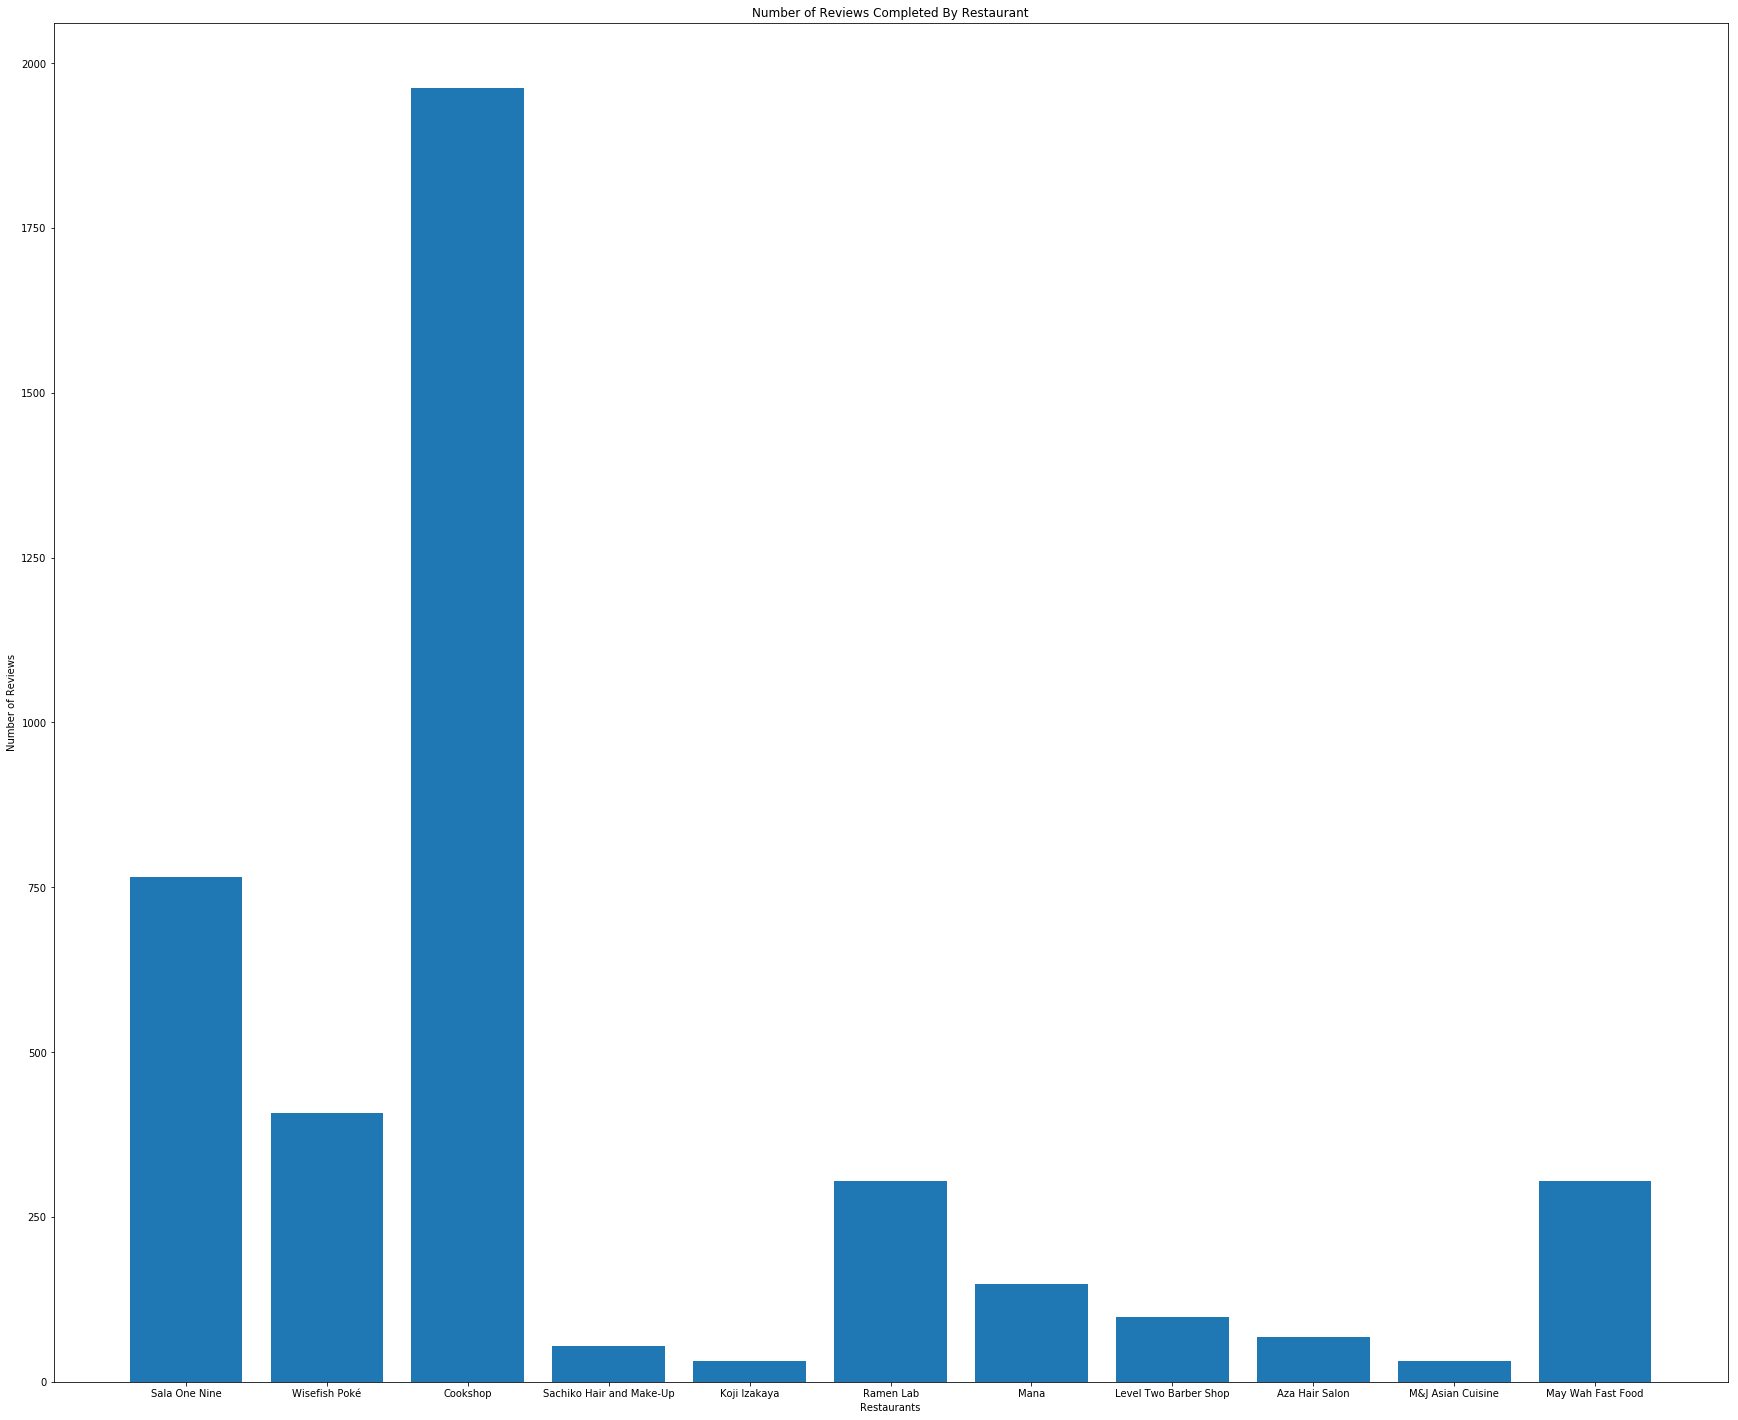

In [11]:
#Your code here
import matplotlib.pyplot as plt
%matplotlib inline
x = []
y = []
for i in data.index:
    if i <= 10 and data['name'][i] != None and data['review_count'][i] != None:
        x.append(data['name'][i])
        y.append(data['review_count'][i])

figure = plt.figure(figsize=(30, 25))
plt.xlabel('Restaurants')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews Completed By Restaurant')
plt.bar(x, y)

In [12]:
df2 = pd.DataFrame(list(zip(data.name, data.rating)), columns=['name', 'rating'])
df2

,name,rating
0,Sala One Nine,4.0
1,Wisefish Poké,4.0
2,Cookshop,4.0
3,Sachiko Hair and Make-Up,5.0
4,Koji Izakaya,4.5
5,Ramen Lab,4.0
6,Mana,4.0
7,Level Two Barber Shop,4.5
8,Aza Hair Salon,4.0
9,M&J Asian Cuisine,4.0


(array([ 1.,  0.,  2.,  0.,  4.,  0., 20.,  0., 16.,  7.]),
 array([2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 <a list of 10 Patch objects>)

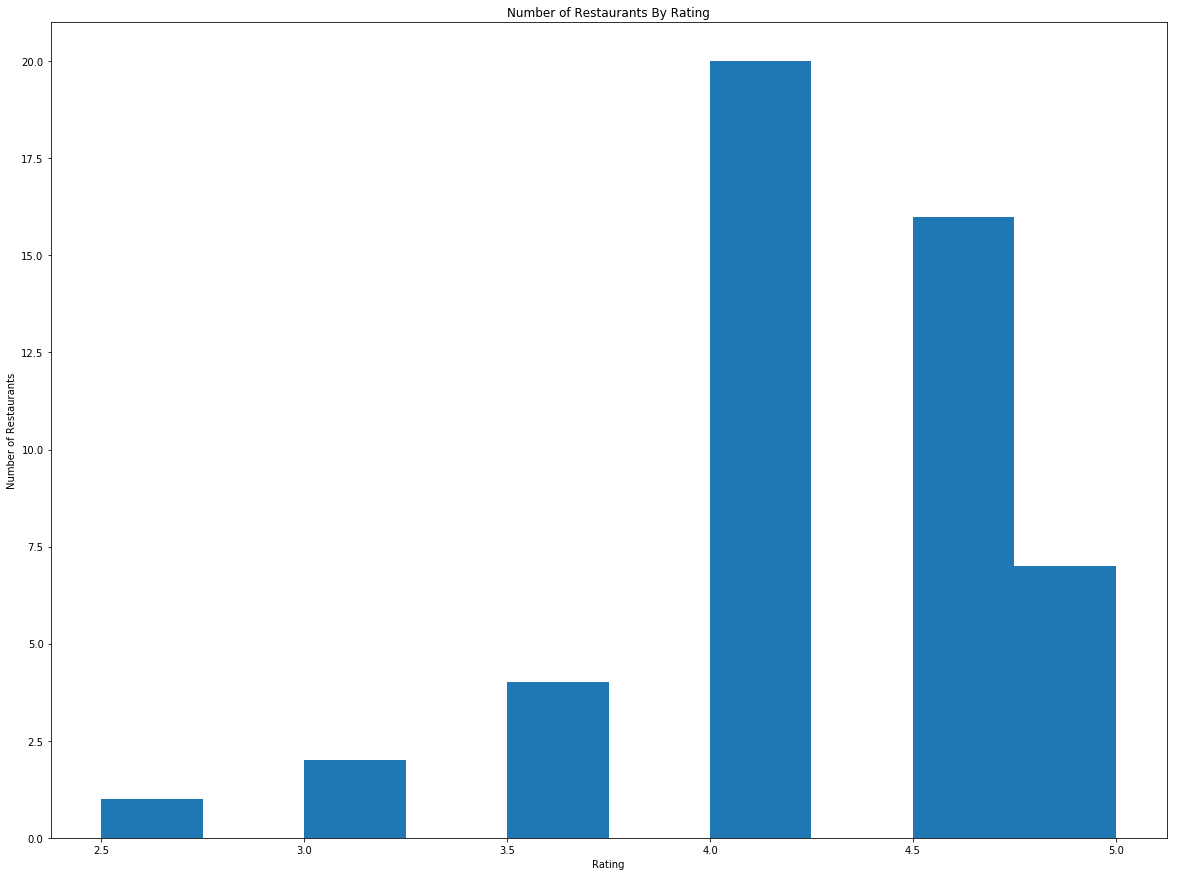

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

n = df2['name']
r = df2['rating']

figure2 = plt.figure(figsize=(20, 15))
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.title('Number of Restaurants By Rating')
plt.hist(r)

## Mapping

Look at the initial Yelp example and try and make a map using Folium of the restaurants you retrieved. Be sure to also add popups to the markers giving some basic information such as name, rating and price.

In [14]:
#Your code here
import folium

coordinates = pd.DataFrame(list(zip(data.name, data.coordinates)), columns=['name', 'coordinates'])
coordinates

,name,coordinates
0,Sala One Nine,"{'latitude': 40.7398849, 'longitude': -73.9931..."
1,Wisefish Poké,"{'latitude': 40.74281, 'longitude': -73.99967}"
2,Cookshop,"{'latitude': 40.7454251, 'longitude': -74.0056..."
3,Sachiko Hair and Make-Up,"{'latitude': 40.7492790222168, 'longitude': -7..."
4,Koji Izakaya,"{'latitude': 40.69195, 'longitude': -73.98641}"
5,Ramen Lab,"{'latitude': 40.7209918, 'longitude': -73.9963..."
6,Mana,"{'latitude': 40.79128, 'longitude': -73.97279}"
7,Level Two Barber Shop,"{'latitude': 40.77259, 'longitude': -73.95588}"
8,Aza Hair Salon,"{'latitude': 40.7406250975219, 'longitude': -7..."
9,M&J Asian Cuisine,"{'latitude': 40.7292851717997, 'longitude': -7..."


In [15]:
coord_list = coordinates.coordinates.values.tolist()
latitude = []
for i in range(len(coord_list)):
        latitude.append(coord_list[i]['latitude'])
latitude

longitude = []
for i in range(len(coord_list)):
        longitude.append(coord_list[i]['longitude'])
longitude

coord = pd.DataFrame(list(zip(data.name, latitude, longitude)), columns=['name', 'latitude', 'longitude'])
coord

,name,latitude,longitude
0,Sala One Nine,40.739885,-73.993104
1,Wisefish Poké,40.742810,-73.999670
2,Cookshop,40.745425,-74.005608
3,Sachiko Hair and Make-Up,40.749279,-73.992592
4,Koji Izakaya,40.691950,-73.986410
5,Ramen Lab,40.720992,-73.996358
6,Mana,40.791280,-73.972790
7,Level Two Barber Shop,40.772590,-73.955880
8,Aza Hair Salon,40.740625,-73.984132
9,M&J Asian Cuisine,40.729285,-73.978037


In [16]:
import folium

base_map = folium.Map(location=[coord['latitude'].mean(), coord['longitude'].mean()], zoom_start=15)
base_map

fg=folium.FeatureGroup(name="Asian Restaurants in NYC")

for lat, lon, name in zip(coord['latitude'], coord['longitude'], coord['name']):
    fg.add_child(folium.Marker(location=[lat,lon], popup=(folium.Popup(name))))

base_map.add_child(fg)

## Summary

Nice work! In this lab, you synthesized your skills for the day, making multiple API calls to Yelp in order to paginate through a results set, performing some basic exploratory analysis and then creating a nice map visual to display the results! Well done!